In [ ]:
print "hi"

In [5]:
import math
import sqlite3
import numpy as np
import LinRegLearner as lrl
import RandomForest as rfl
import SVM as svml
from sklearn import linear_model
from sklearn import preprocessing  ## sklern is ML library-- preprocessing
import pandas as pd
import matplotlib.pyplot as plt


if __name__=="__main__":
    print("Setting experiment values")

    conn = sqlite3.connect('/Users/Madhu/Downloads/fresh.db')

    c = conn.cursor()

    input=np.empty([0,47])

    for row in c.execute('SELECT * FROM final limit 6000'):
        input = np.vstack([input, row])

    #gender,credential
    feature_list = [2,4]
    #gradyear,primary spec,
    feature_list.extend(range(5,7), )
    #second
    feature_list.extend([11], )
    #state
    feature_list.extend([13], )
    # 16 | ReportedQualityMeasures | | 0 | | 0
    # 17 | UsedEHR | | 0 | | 0
    # 18 | ParticipatedMedicareMaintenance | | 0 | | 0
    # 19 | CommittedHeartHealth | | 0 | | 0
    # 20 | PQRS_Participation | | 0 | | 0
    # 21 | FluShot | | 0 | | 0
    # 22 | PneumoniaVaccine | | 0 | | 0
    # 23 | DepressionScreening | | 0 | | 0
    # 24 | TobaccoScreening | | 0 | | 0
    # 25 | BodyWeightScreening | | 0 | | 0
    # 26 | BloodPressureScreening | | 0 | | 0
    # 27 | BreastCancerScreening | | 0 | | 0
    # 28 | ColorectalCancerScreening | | 0 | | 0
    # 29 | CompareNewOldMed | | 0 | | 0
    # 30 | ControlBP_InDiabetesPatients | | 0 | | 0
    # 31 | ReduceHeartAttack | | 0 | | 0
    # 32 | HeartFailurePatients | | 0 | | 0
    # 33 | MedToImprovePumpingAction_HeartPatients | | 0 | | 0
    # 34 | Y | | 0 | | 0
    feature_list.extend(range(16,34),)
    # 36 | Total_Claim_Count | INT | 0 | | 0
    # 37 | Total_Day_Supply | INT | 0 | | 0
    # 38 | Total_Drug_Cost | INT | 0 | | 0
    # 39 | Bene_Count_Ge65 | INT | 0 | | 0
    # 40 | Total_Claim_Count_Ge65 | INT | 0 | | 0
    # 41 | Total_Day_Supply_Ge65 | INT | 0 | | 0
    # 42 | Total_Drug_Cost_Ge65 | INT | 0 | | 0
    # 43 | Total_Amount_of_Payment_USDollars | REAL | 0 | | 0
    # 44 | Form_of_Payment_or_Transfer_of_Value | TEXT | 0 | | 0
    # 45 | Nature_of_Payment_or_Transfer_of_Value | TEXT | 0 | | 0
    # 46 | MedSchoolRank | INT | 0 | | 0
    feature_list.extend(range(36,47),)

    inputX=input[:,feature_list]
    inputY=input[:,35]

    inputX_f=np.ones(inputX.shape)
    inputY_f=np.ones(inputY.shape)



    encoding = preprocessing.LabelEncoder()  ## create label encoding object
    inputX[:, 0] = encoding.fit_transform(inputX[:, 0])
    # Credential
    inputX[:, 1] = encoding.fit_transform(inputX[:, 1])
    # primary spec
    inputX[:, 3] = encoding.fit_transform(inputX[:, 3])
    # sec
    inputX[:, 4] = encoding.fit_transform(inputX[:, 4])
    # state
    inputX[:, 5] = encoding.fit_transform(inputX[:, 5])
    #form payment
    inputX[:, 32] = encoding.fit_transform(inputX[:, 32])
    #nature payment
    inputX[:, 33] = encoding.fit_transform(inputX[:, 33])



    for i in range(0,inputX.shape[0]):
        for j in range(0, inputX.shape[1]):
            if(inputX[i,j]==''):
                inputX_f[i,j]=0.0
            else:
                inputX_f[i,j]=float(inputX[i,j])


    for i in range(0,inputY.shape[0]):
        if (inputY[i] == ''):
            inputY_f[i] = 0.0
        else:
            inputY_f[i] = float(inputY[i])

    inputX_f[:, 2] = 2016-inputX_f[:, 2]

    print inputX_f.shape

 

Setting experiment values
(6000, 35)


In [255]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import LinRegLearner as lrl
import RandomForest as rfl
import SVM as svml
import pandas as pd

#compute how much of the data is training and testing
train_rows = int(math.floor(0.6* inputX.shape[0]))
test_rows = inputX.shape[0] - train_rows
    
    # separate out training and testing data
trainX = inputX_f[:train_rows,:]
trainY = inputY_f[:train_rows]
testX = inputX_f[train_rows:,:]
testY = inputY_f[train_rows:]

std_scale = preprocessing.StandardScaler().fit(trainX)
trainX = std_scale.transform(trainX)
testX = std_scale.transform(testX)
print trainX.shape
lda = LDA(n_components=100)
lda = lda.fit(trainX,trainY)
trainX = lda.transform(trainX)
testX = lda.transform(testX)
print trainX.shape

# Linear Regression
learner = lrl.LinRegLearner(verbose = True)
learner.addEvidence(trainX,trainY,testX,testY)
    
    
    # Random Forest
learner = rfl.RandomForest(verbose = True)
learner.addEvidence(trainX,trainY,testX,testY)
    
    #SVM
learner = svml.SupportVectorMachine(verbose=True)
learner.addEvidence(trainX, trainY, testX, testY)

#     from pandas.tools.plotting import scatter_matrix

#     scatter_matrix(df1, alpha=0.2, figsize=(6, 6), diagonal='kde')



(3600, 35)
(3600, 30)
('Coefficients: \n', array([ -1.81375551e+00,   1.77591355e+00,   2.09067268e+00,
         1.30060823e-01,   1.69232939e-02,  -9.80820864e-03,
         9.83368041e-03,  -5.17712580e-03,  -2.92034985e-02,
         6.69728782e-03,   8.53888317e-02,  -3.16981473e-02,
         2.10128666e-02,   6.45789067e-02,   2.24742534e-02,
         6.41106302e-02,  -3.61179997e-02,  -2.73895017e-02,
         1.24423563e-02,   4.42723142e-02,  -1.31651546e-02,
         9.69361138e-03,  -2.76087383e-02,  -9.74878630e-03,
        -1.90044166e-02,   6.56834640e-03,   7.80274999e-03,
        -4.38569626e-03,   1.16876095e-02,  -5.79816008e-05]))
Mean squared error: 34.90
Variance score: 0.64
[ 0.88870837  0.91541039  0.93021277]
Mean squared error: 78.94
Variance score: 0.92
[ 0.88545898  0.91289782  0.9293617 ]
Mean squared error: 30.91
Variance score: 0.94


In [236]:
import pandas as pd

# #compute how much of the data is training and testing
# train_rows = int(math.floor(0.6* x.shape[0]))
# test_rows = x.shape[0] - train_rows
    
#     # separate out training and testing data
# trainX = x[:train_rows,:]
# trainY = inputY_f[:train_rows]
# testX = x[train_rows:,:]
# testY = inputY_f[train_rows:]

# std_scale = preprocessing.StandardScaler().fit(trainX)
# trainX = std_scale.transform(trainX)
# testX = std_scale.transform(testX)
# print trainX.shape
# lda = LDA(n_components=100)
# lda = lda.fit(trainX,trainY)
# trainX = lda.transform(trainX)
# testX = lda.transform(testX)
# print trainX.shape

# Linear Regression
print trainX.shape,trainY.shape,testX.shape,testY.shape
learner = lrl.LinRegLearner(verbose = True)
learner.addEvidence(trainX,trainY,testX,testY)

(2767, 31) (2767,) (1846, 31) (3233,)
('Coefficients: \n', array([-0.32912606,  0.46492503,  0.32508876, -0.28070666,  0.23406806,
       -0.08155896, -0.02324055,  0.11061557,  0.18773023, -0.18357354,
        0.26790823,  0.02759806, -0.15731414, -0.32001749, -0.11523636,
        0.00190638, -0.40113905,  0.03796691,  0.30663085, -0.0473321 ,
       -0.0217205 , -0.24326902, -0.09616043, -0.1982515 , -0.04508905,
       -0.1011676 ,  0.05301123, -0.1151621 , -0.18284732,  0.09264993,
        0.03173114]))


ValueError: operands could not be broadcast together with shapes (1846,) (3233,) 

In [256]:
from sklearn import linear_model
from sklearn import cross_validation

regr = linear_model.LinearRegression()


        # Train the model using the training sets
regr.fit(trainX, trainY)

        # The coefficients
print('Coefficients: \n', regr.coef_)
        # The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(testX) - testY) ** 2))
        # Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(testX, testY))

scores = cross_validation.cross_val_score(regr, trainX, trainY, scoring='accuracy',
                                                  cv=3)
print scores

('Coefficients: \n', array([ -1.81375551e+00,   1.77591355e+00,   2.09067268e+00,
         1.30060823e-01,   1.69232939e-02,  -9.80820864e-03,
         9.83368041e-03,  -5.17712580e-03,  -2.92034985e-02,
         6.69728782e-03,   8.53888317e-02,  -3.16981473e-02,
         2.10128666e-02,   6.45789067e-02,   2.24742534e-02,
         6.41106302e-02,  -3.61179997e-02,  -2.73895017e-02,
         1.24423563e-02,   4.42723142e-02,  -1.31651546e-02,
         9.69361138e-03,  -2.76087383e-02,  -9.74878630e-03,
        -1.90044166e-02,   6.56834640e-03,   7.80274999e-03,
        -4.38569626e-03,   1.16876095e-02,  -5.79816008e-05]))
Mean squared error: 34.90
Variance score: 0.64


ValueError: Can't handle mix of multiclass and continuous

In [10]:
cols=['Gender','Credential','Experience','Primary Spec','Sec Spec','State',
'ReportedQualityMeasures','UsedEHR','ParticipatedMedicareMaintenance','CommittedHeartHealth',
'PQRS_Participation','FluShot','PneumoniaVaccine','DepressionScreening','TobaccoScreening',
'BodyWeightScreening','BloodPressureScreening','BreastCancerScreening','ColorectalCancerScreening',
    'CompareNewOldMed','ControlBP_InDiabetesPatients','ReduceHeartAttack','HeartFailurePatients',
    'MedToImprovePumpingAction_HeartPatients',
    'Total_Claim_Count', 'Total_Day_Supply','Total_Drug_Cost','Bene_Count_Ge65','Total_Claim_Count_Ge65',
    'Total_Day_Supply_Ge65','Total_Drug_Cost_Ge65','Total_Amount_of_Payment_USDollars','Payment Form',
          'Payment Nature','MedSchoolRank']
df = pd.DataFrame(inputX_f, columns=cols)


# import matplotlib.pyplot as plt
# plt.plot(df['HeartFailurePatients'],inputY_f, 'ro')
# plt.show()


    # pd.options.display.mpl_style = 'default'
    # df.boxplot()
    #
    # cols = ['Total_Day_Supply', 'Total_Drug_Cost', 'Bene_Count_Ge65', 'Total_Claim_Count_Ge65', 'Total_Day_Supply_Ge65',
    #         'Total_Drug_Cost_Ge65', 'MedSchoolRank']
    # df1 = pd.DataFrame(inputX_f[:, [25, 26, 27, 28, 29, 30, 34]], columns=cols)

In [237]:
df['Y']=inputY_f

In [238]:
df.shape

(6000, 36)

In [13]:
print "hi"

hi


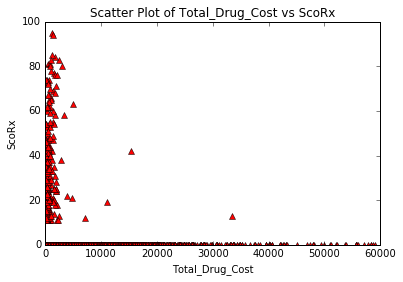

In [285]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['Total_Drug_Cost'],inputY_f, 'r^')
plt.axis([0, 60000, 0, 100])
plt.xlabel('Total_Drug_Cost')
plt.ylabel('ScoRx')
plt.title('Scatter Plot of Total_Drug_Cost vs ScoRx')
plt.figure(figsize=(1,1))
plt.show()

In [166]:
from pandas.tools.plotting import scatter_matrix
cols1=['Total_Day_Supply','Total_Claim_Count_Ge65','Total_Claim_Count',\
       'Total_Day_Supply_Ge65','Bene_Count_Ge65']
df1 = pd.DataFrame(inputX_f[:,[25,28,24,29,27]], columns=cols1)
# scatter_matrix(df1, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [167]:
df2 = df1
for col in cols1:
    df2 = df2[df2[col]<4000].copy(deep=True)

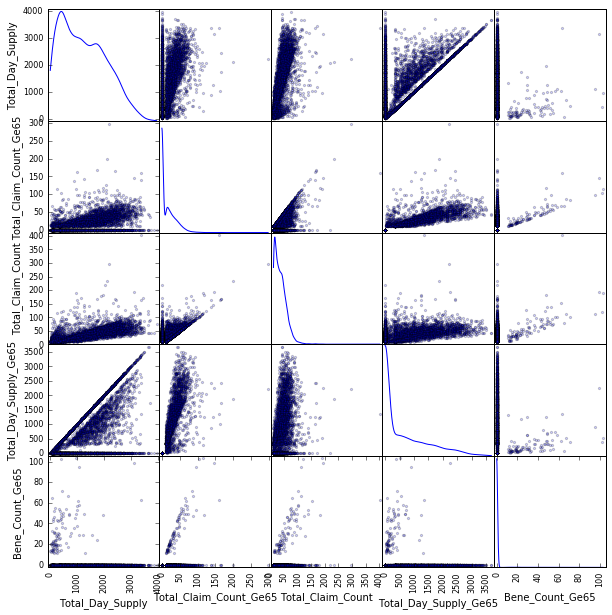

In [170]:
scatter_matrix(df2, alpha=0.2, figsize=(10, 10), diagonal='kde')

#total day supply 1700

# for i in range(5):
#     for j in range(5):
#         axarr[i,j].set_ylim(0,5000)
#         axarr[i,j].set_xlim(0,5000)
        


# axarr[0,0].set_xlim(0,1700)
# axarr[0,1].set_ylim(0,1700)
# axarr[0,1].set_xlim(0,1700)
# axarr[0,2].set_ylim(0,1700)
# axarr[0,2].set_xlim(0,1700)
# axarr[0,3].set_ylim(0,1700)
# axarr[0,3].set_xlim(0,1700)
# axarr[0,4].set_ylim(0,1700)
# axarr[0,4].set_xlim(0,1700)


# axarr[1,0].set_ylim(0,200)
# axarr[1,0].set_xlim(0,200)
# axarr[1,1].set_ylim(0,1700)
# axarr[1,1].set_xlim(0,200)
# axarr[1,2].set_ylim(0,1700)
# axarr[1,2].set_xlim(0,200)
# axarr[1,3].set_ylim(0,1700)
# axarr[1,3].set_xlim(0,200)
# axarr[1,4].set_ylim(0,1700)
# axarr[1,4].set_xlim(0,200)

# axarr[2,0].set_ylim(0,200)
# axarr[2,0].set_xlim(0,200)
# axarr[2,1].set_ylim(0,1700)
# axarr[2,1].set_xlim(0,200)
# axarr[2,2].set_ylim(0,1700)
# axarr[2,2].set_xlim(0,200)
# axarr[2,3].set_ylim(0,1700)
# axarr[2,3].set_xlim(0,200)
# axarr[2,4].set_ylim(0,1700)
# axarr[2,4].set_xlim(0,200)

# axarr[3,0].set_ylim(0,200)
# axarr[3,0].set_xlim(0,200)
# axarr[3,1].set_ylim(0,1700)
# axarr[3,1].set_xlim(0,200)
# axarr[3,2].set_ylim(0,1700)
# axarr[3,2].set_xlim(0,200)
# axarr[3,3].set_ylim(0,1700)
# axarr[3,3].set_xlim(0,200)
# axarr[3,4].set_ylim(0,1700)
# axarr[3,4].set_xlim(0,200)


# axarr[4,0].set_ylim(0,80)
# axarr[4,0].set_xlim(0,1700)
# # axarr[4,1].set_ylim(0,1700)
# # axarr[4,1].set_xlim(0,200)
# # axarr[4,2].set_ylim(0,1700)
# # axarr[4,2].set_xlim(0,200)
# # axarr[4,3].set_ylim(0,1700)
# # axarr[4,3].set_xlim(0,200)
# axarr[4,4].set_ylim(0,80)
# axarr[4,4].set_xlim(0,80)
plt.draw()

In [124]:
df.shape
df2=df

In [114]:
df['Y']=inputY_f

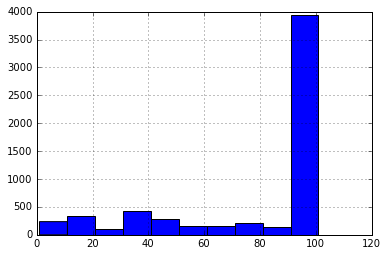

In [230]:
df[cols[34]].hist()

In [249]:
df2=df.copy()
df2 = df2[df2[cols[2]]<500].copy(deep=True)
df2 = df2[df2[cols[24:31]]<4000].copy(deep=True)
# df2 = df2[df2[cols[34]]<4000].copy(deep=True)

In [251]:
inputY_f_new=df2['Y']
df3=df2.copy()
df3.drop('Y')
x=df3.as_matrix()

ValueError: labels ['Y'] not contained in axis

In [250]:
#df2=df.copy()
#df2.shape
#type(df.copy())
df2.shape

(5911, 36)

In [252]:
df2

,Gender,Credential,Experience,Primary Spec,Sec Spec,State,ReportedQualityMeasures,UsedEHR,ParticipatedMedicareMaintenance,CommittedHeartHealth,...,Total_Drug_Cost,Bene_Count_Ge65,Total_Claim_Count_Ge65,Total_Day_Supply_Ge65,Total_Drug_Cost_Ge65,Total_Amount_of_Payment_USDollars,Payment Form,Payment Nature,MedSchoolRank,Y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2303.14,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,32.0,1260.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1688.78,0.0,52.0,1696.0,1688.78,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,442.01,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,45.0,2430.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,195.97,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1042.53,0.0,27.0,339.0,700.24,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,29.0,1230.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1965.18,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,399.24,0.0,55.0,2310.0,344.63,NaN,NaN,NaN,NaN,NaN


In [163]:
df2[df2[cols[6]]]

,Gender,Gender,Gender,Gender,Gender,Gender,Gender,Gender,Gender,Gender,...,Gender,Gender,Gender,Gender,Gender,Gender,Gender,Gender,Gender,Gender
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [149]:
df2.shape

(6000, 36)

In [139]:
if df2[cols[6]]<0 is True:
    print "true"

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().